In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('application_train.csv')
df1 = pd.read_csv('new_bureau.csv').drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('prev.csv').drop(['Unnamed: 0'], axis=1)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [3]:
df1.head()

SK_ID_CURR  CREDIT_ACTIVE_CLOSED  CREDIT_ACTIVE_ACTIVE  CREDIT_ACTIVE_SOLD  \
0      215354                     5                     6                   0   
1      162297                     3                     3                   0   
2      402440                     0                     1                   0   
3      238881                     5                     3                   0   
4      222183                     3                     5                   0   

   CREDIT_ACTIVE_BAD_DEBT  CREDIT_DAY_OVERDUE  AVG_AMT_CREDIT_SUM  
0                       0                 0.0        5.430859e+05  
1                       0                 0.0        1.371731e+06  
2                       0                 0.0        8.991000e+04  
3                       0                 0.0        1.606549e+05  
4                       0                 0.0        8.948700e+05

In [4]:
df2.head()

AMT_APPLICATION_APPROVED  AMT_APPLICATION_REFUSED  \
0                         2                        1   
1                         6                        0   
2                         3                        0   
3                         6                       15   
4                         8                       13   

   AMT_APPLICATION_CANCELED  AMT_APPLICATION_UNUSED  SK_ID_CURR  
0                         0                       0      271877  
1                         0                       0      108129  
2                         1                       0      122040  
3                         2                       0      176158  
4                         4                       0      202054

In [5]:
df = df.join(df1.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_WEEK  \
0           24700.5  ...                         0.0   
1           35698.5  ...                         0.0   
2            6750.0  ...                         0.0   
3           29686.5  ...                         NaN   
4           21865.5  ...                         0.0   
...             ...  ...                         ...   
307506      27558.0  ...                         NaN   
307507      12001.5  ...                         NaN   
307508      29979.0  ...                         0.0   
307509      20205.0  ...                         0.0   
307510      49117.5  ...                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            NaN                       NaN   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       NaN                       NaN   
307507                       NaN                       NaN   
307508                       1.0                       0.0   
307509                       0.0                       0.0   
307510                       2.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR CREDIT_ACTIVE_CLOSED CREDIT_ACTIVE_ACTIVE  \
0                             1.0                  6.0                  2.0   
1                             0.0                  3.0                  1.0   
2                             0.0                  2.0                  0.0   
3                             NaN                  NaN                  NaN   
4                             0.0                  1.0                  0.0   
...                           ...                  ...                  ...   
307506                        NaN                  NaN                  NaN   
307507                        NaN                  NaN                  NaN   
307508                        1.0                  2.0                  2.0   
307509                        0.0                  1.0                

In [6]:
df = df.join(df2.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  CREDIT_ACTIVE_CLOSED CREDIT_ACTIVE_ACTIVE  \
0           24700.5  ...                   6.0                  2.0   
1           35698.5  ...                   3.0                  1.0   
2            6750.0  ...                   2.0                  0.0   
3           29686.5  ...                   NaN                  NaN   
4           21865.5  ...                   1.0                  0.0   
...             ...  ...                   ...                  ...   
307506      27558.0  ...                   NaN                  NaN   
307507      12001.5  ...                   NaN                  NaN   
307508      29979.0  ...                   2.0                  2.0   
307509      20205.0  ...                   1.0                  0.0   
307510      49117.5  ...                   6.0                  5.0   

       CREDIT_ACTIVE_SOLD CREDIT_ACTIVE_BAD_DEBT CREDIT_DAY_OVERDUE  \
0                     0.0                    0.0                0.0   
1                     0.0                    0.0                0.0   
2                     0.0                    0.0                0.0   
3                     NaN                    NaN                NaN   
4                     0.0                    0.0                0.0   
...                   ...                    ...                ...   
307506                NaN                    NaN                NaN   
307507                NaN                    NaN                NaN   
307508                0.0                    0.0                0.0   
307509                0.0                    0.0                0.0   
307510                0.0                    0.0                0.0   

       AVG_AMT_CREDIT_SUM  AMT_APPLICATION_APPROVED  AMT_APPLICATION_REFUSED  \
0           108131.945625                       1.0                      0.0   
1           254350.125000                       3.0                      0.0   
2            94518.900000                       1.0                      0.0   
3                     NaN                       5.0                      1.0   
4           146250.000000                       6.0                      0.0   
...                   ...                       ...                      ...   
307506      

In [7]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [8]:
df.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

In [9]:
df.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [10]:
df.replace("XNA", np.nan,inplace=True)
df.replace("XAP", np.nan,inplace=True)

In [11]:
df.isna().sum().sort_values(ascending=True)

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

#### Удаляем: 
        
       1)  столбцы полностью с EMERGENCYSTATE_MODE до COMMONAREA_MEDI + EXT_SOURCE_3 + SK_ID_CURR

       2)  в столбцах AMT_ANNUITY, AMT_GOODS_PRICE, EXT_SOURCE_2,NAME_TYPE_SUITE, DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE удаляем строки с пропущенными значениями
         
       3) в столбце OCCUPATION_TYPE меняем пропущенные значения на строку "NAN"
         
       4) столбцы AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT меняем пустые значения на средние значения

In [12]:
##### 1)
df = df.drop(['SK_ID_CURR','EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG',
         'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI','FLOORSMAX_MODE', 'LIVINGAREA_AVG',
         'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
         'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI',
         'ELEVATORS_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
         'EXT_SOURCE_1', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'LANDAREA_MEDI', 
         'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 
         'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
         'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
         'NONLIVINGAPARTMENTS_MODE','COMMONAREA_MODE','COMMONAREA_AVG','COMMONAREA_MEDI', 'EXT_SOURCE_3'], axis=1)

##### 2)

a = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
     'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']

for col in a:
    df = df[df[col].notna()]
    
##### 3)
df["OCCUPATION_TYPE"].fillna('unknown_job', inplace=True)


##### 4)
b = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 
     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT']

for col in b:
    df[col].fillna(df[col].mean(), inplace=True)

In [13]:
df.shape

(304531, 81)

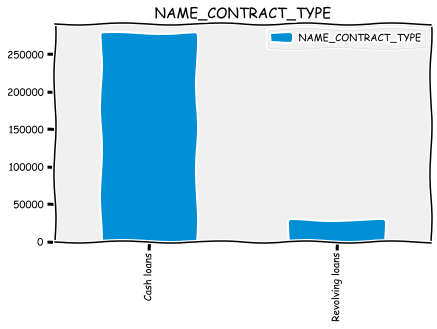

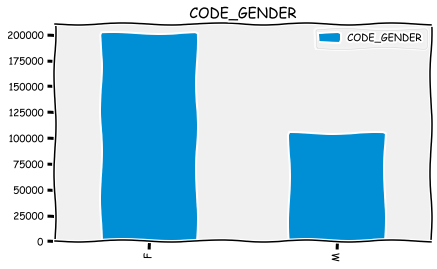

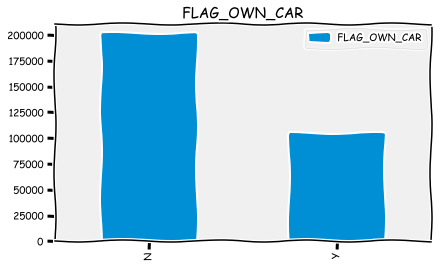

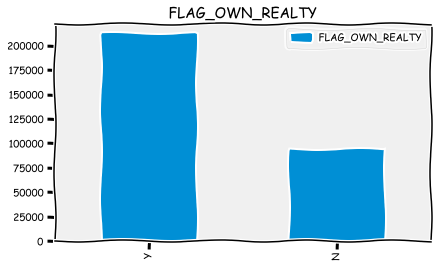

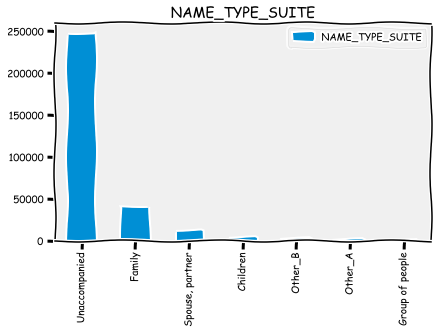

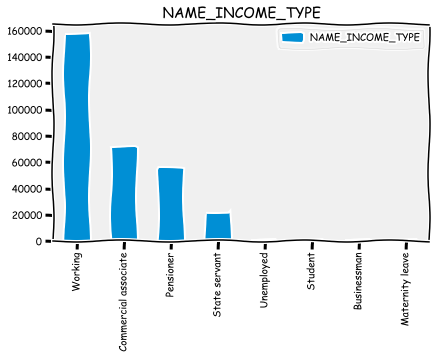

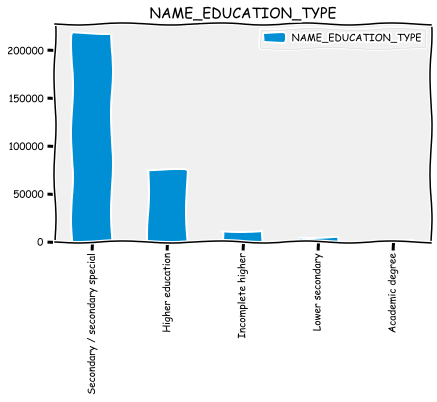

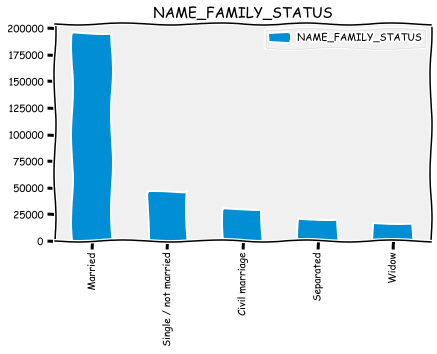

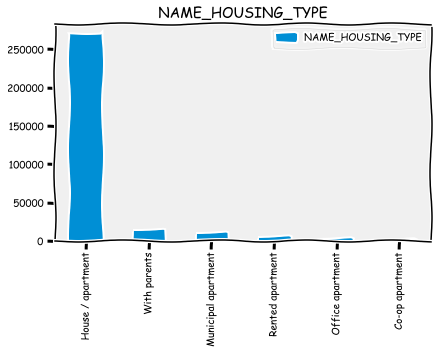

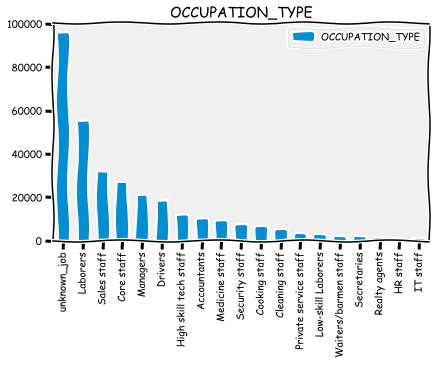

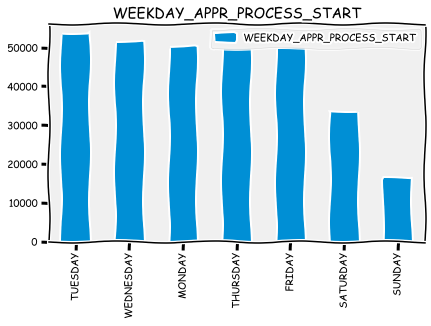

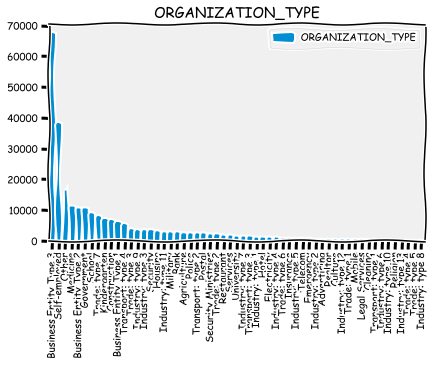

In [14]:
plt.style.use('fivethirtyeight')
plt.xkcd()

for i in range(len(df.select_dtypes(include=['object']).columns.tolist())):
    df[df.select_dtypes(include=['object']).columns.tolist()[i]].value_counts().plot(kind='bar', legend=True, title=df.select_dtypes(include=['object']).columns.tolist()[i])
    plt.show()
    print('\n')

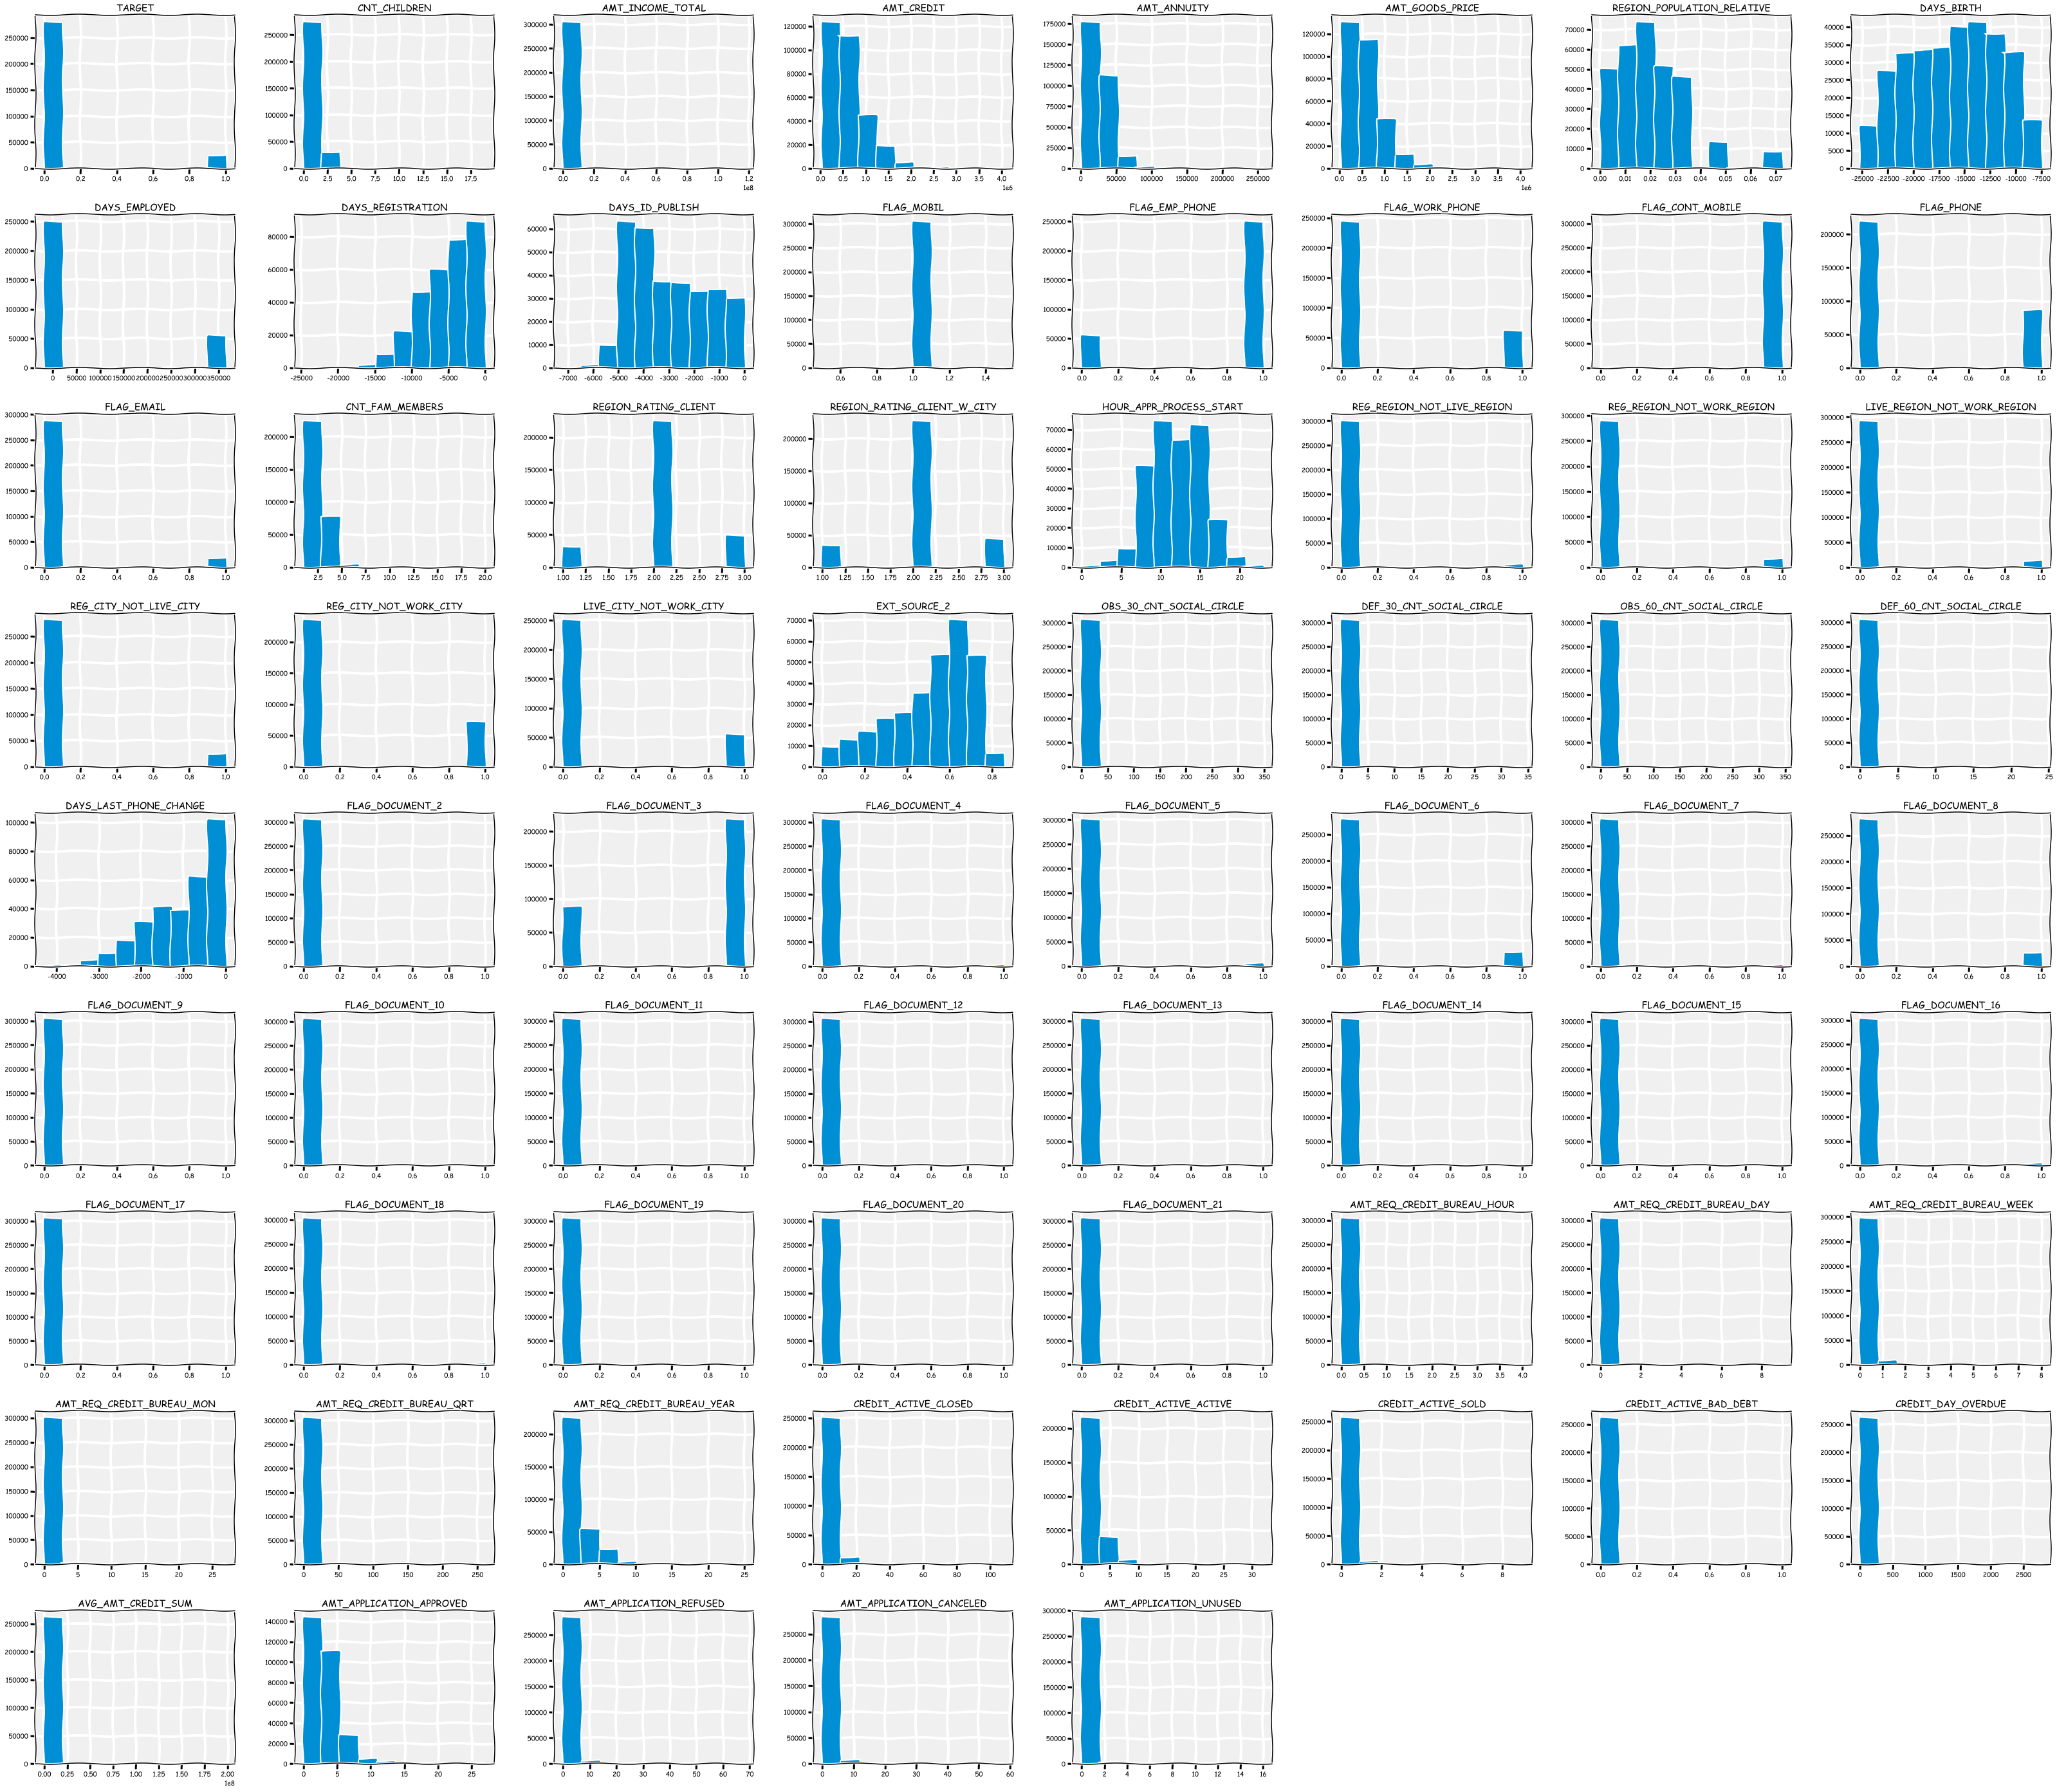

In [15]:
# Visualize Numeric Variable Distributions
df.hist(figsize=(50,50))
plt.show()

# TARGET variable

In [16]:
# а что с целевой переменной?
df.TARGET.value_counts()

0    279864
1     24667
Name: TARGET, dtype: int64

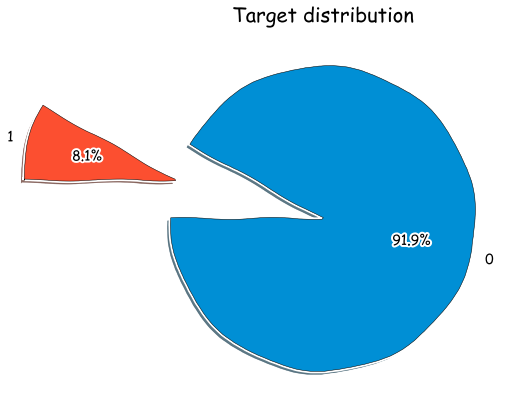

In [17]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.xkcd()

slices = df.TARGET.value_counts()
labels = df.TARGET.value_counts().reset_index()['index']
explode = df.TARGET.value_counts().reset_index()['index']

plt.pie(slices,
        labels=labels,
        explode=explode, 
        shadow=True,
        startangle=180, 
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'}
        )


plt.title('Target distribution')
plt.tight_layout()

plt.show()

# Outliers

In [18]:
# the function returns an array of outliers
def outlier(array):
    # Finding Q1, Q3
    Q1,Q3 = np.percentile(array, [5,95])
    
    # Finding IQR, upper limit, lower limit
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    # Determining outliers
    outliers = array[(array > ul) | (array < ll)]
    return outliers

# the function deletes outliers from numerical fields
def withoutOutliers(outlier, df):
    out = pd.DataFrame(outlier)
    df = df[~df.index.isin(out.index)]
    return df

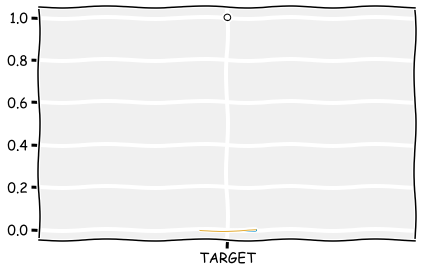

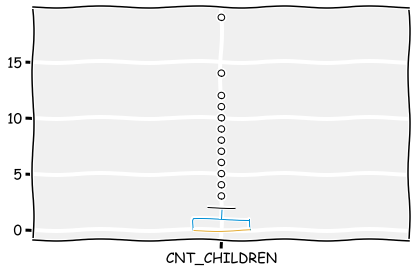

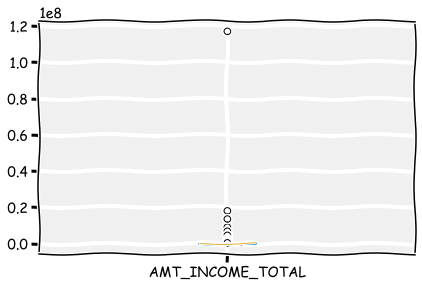

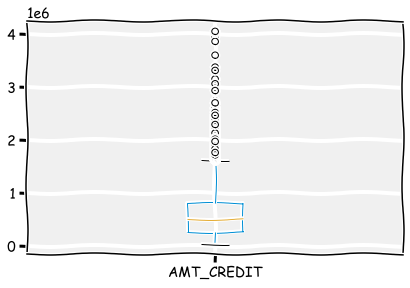

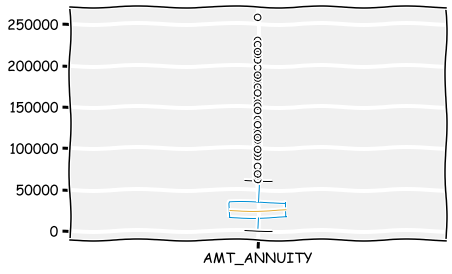

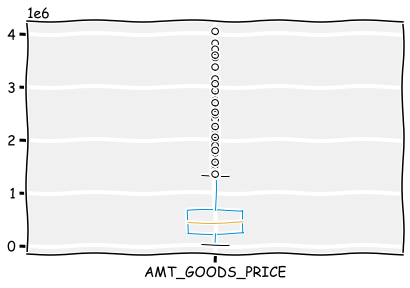

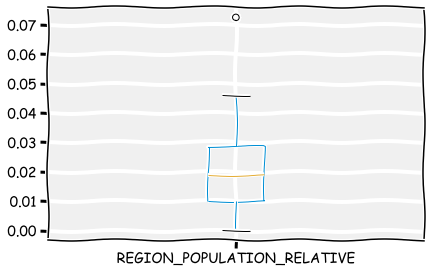

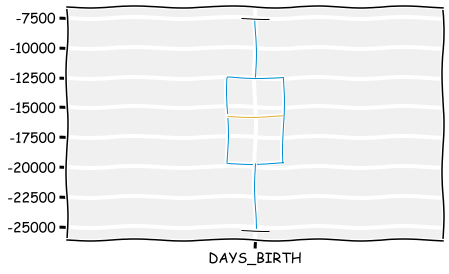

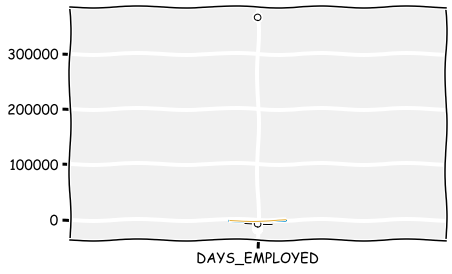

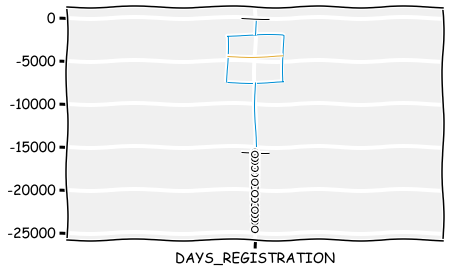

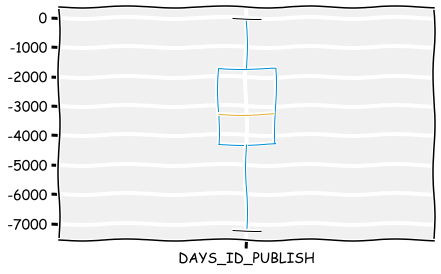

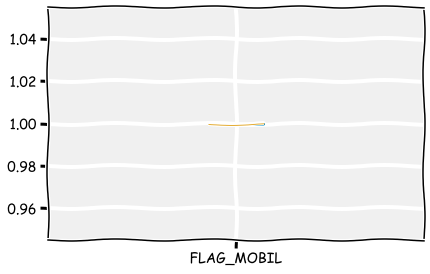

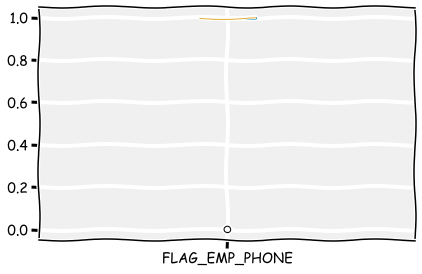

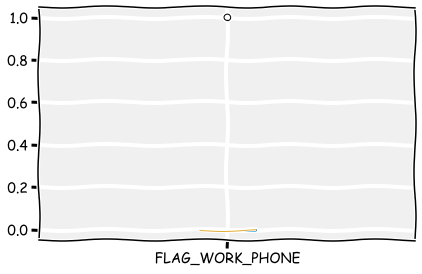

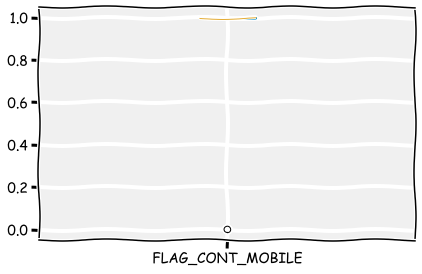

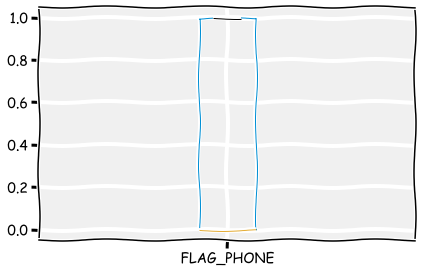

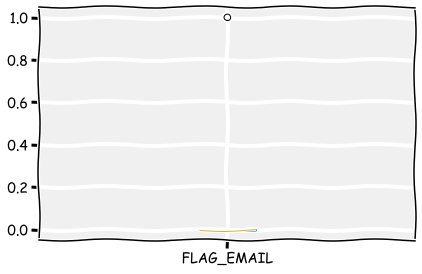

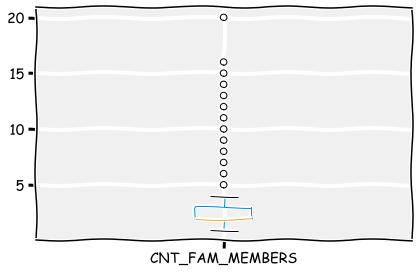

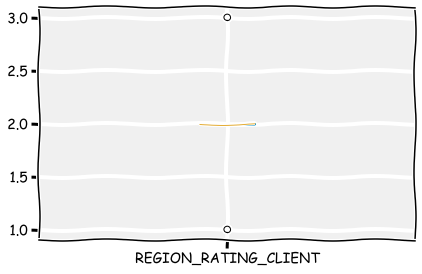

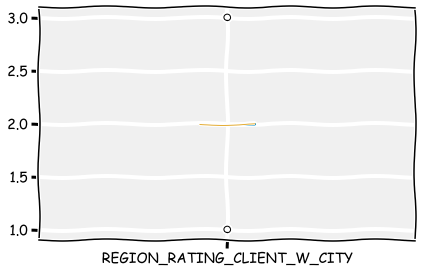

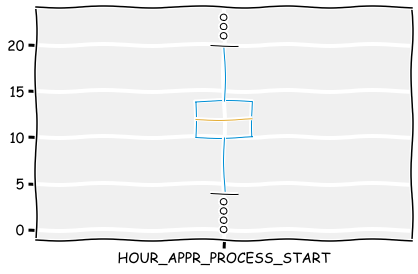

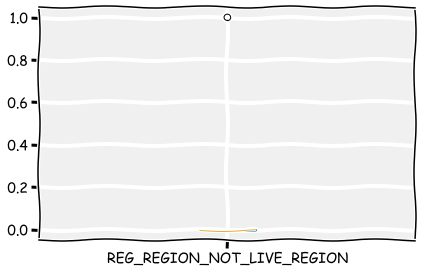

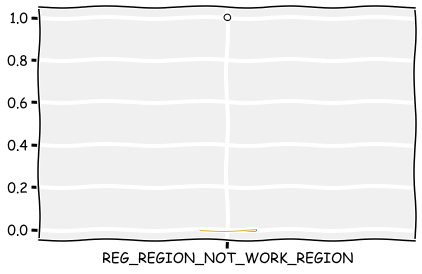

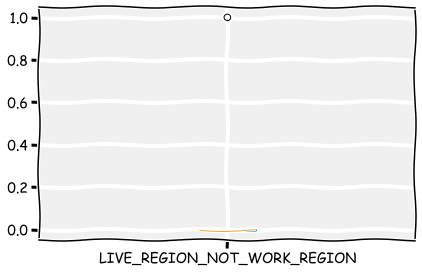

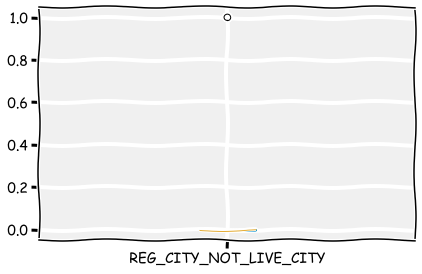

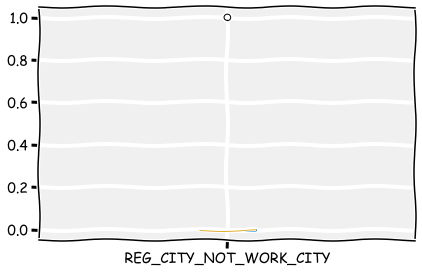

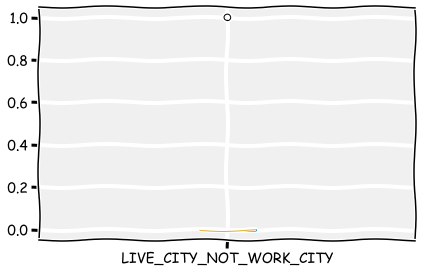

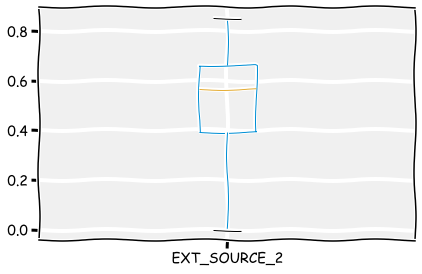

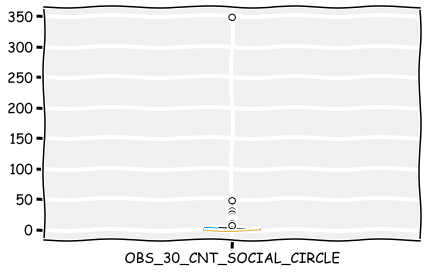

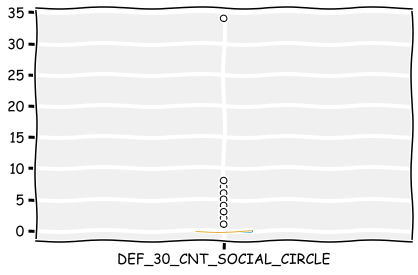

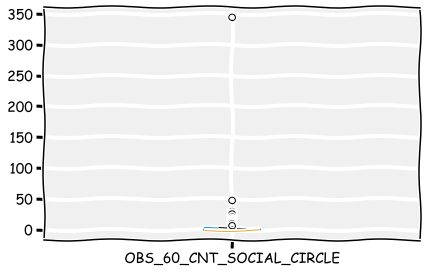

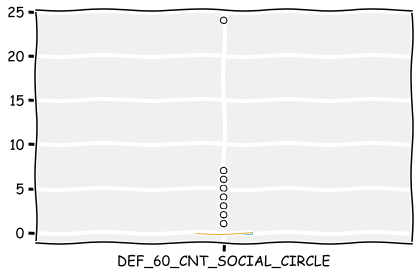

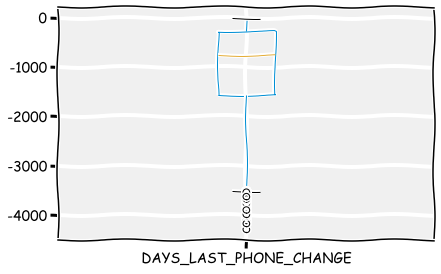

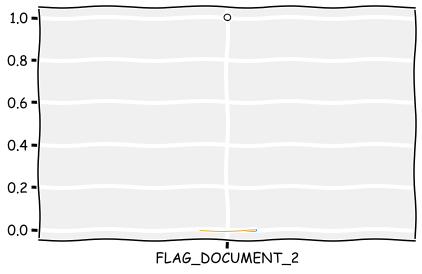

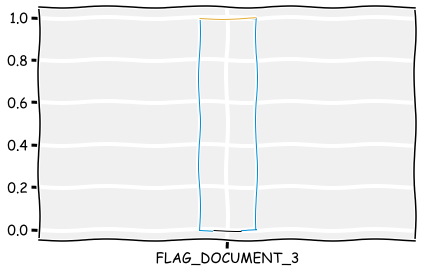

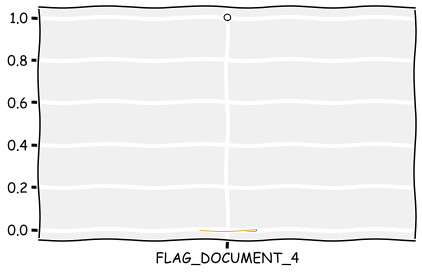

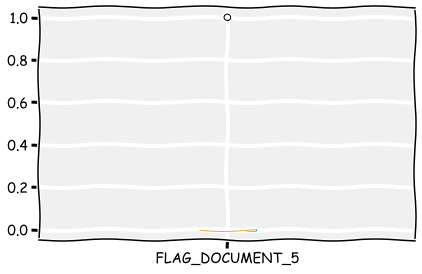

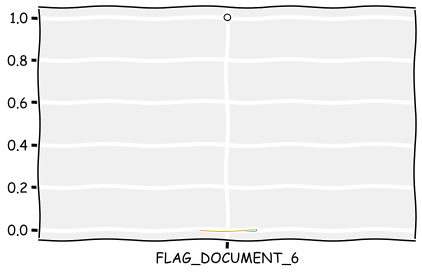

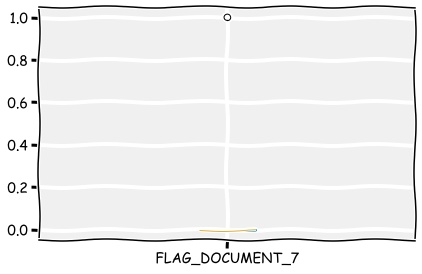

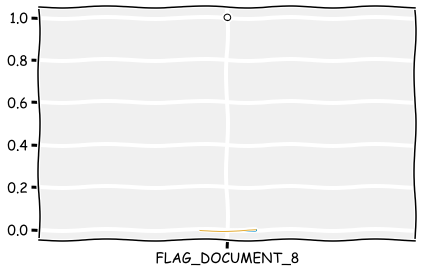

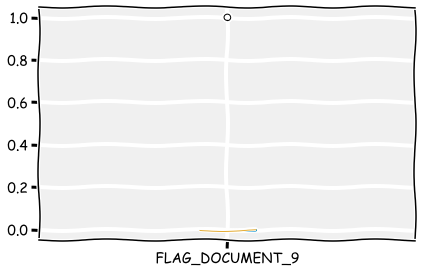

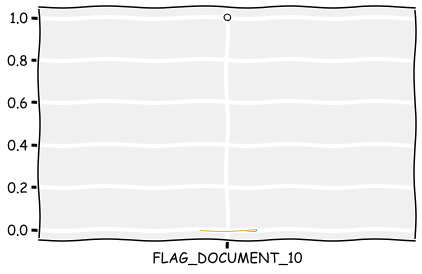

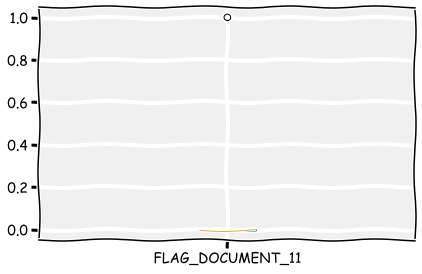

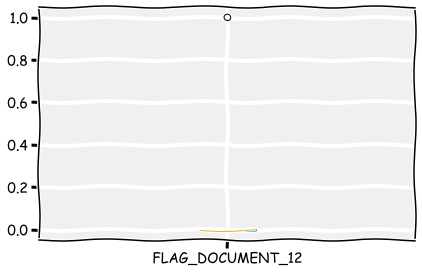

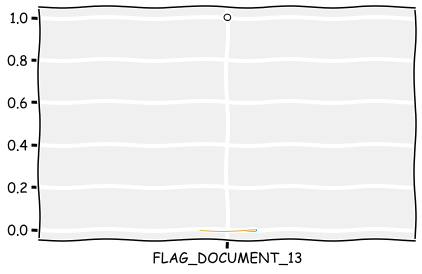

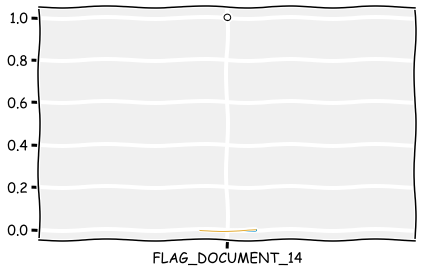

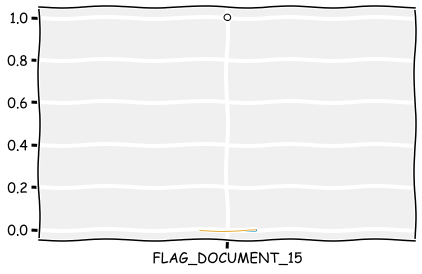

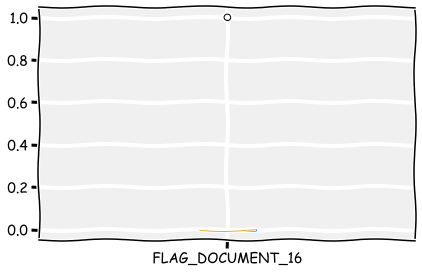

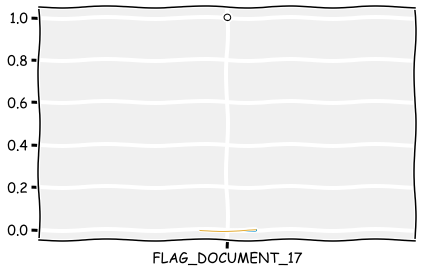

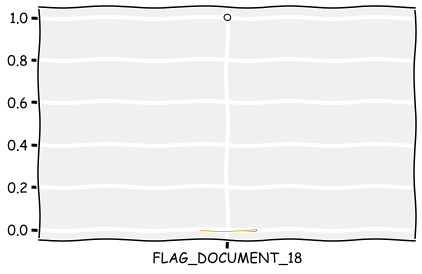

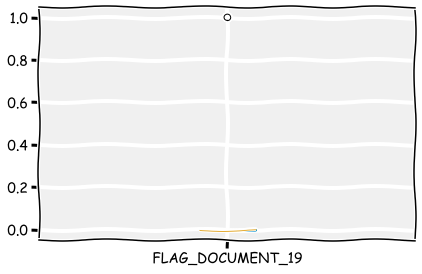

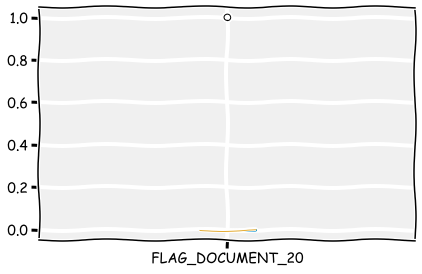

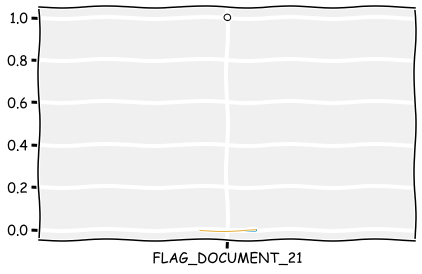

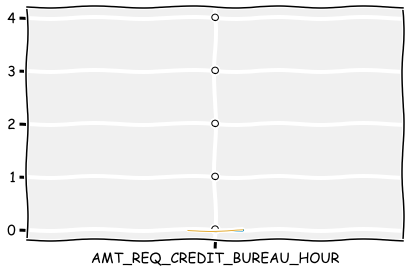

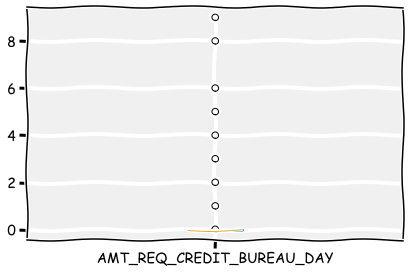

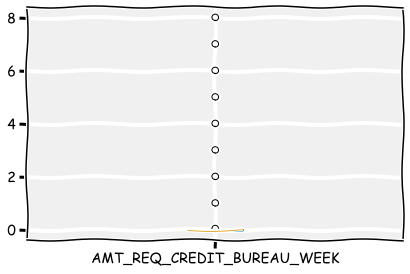

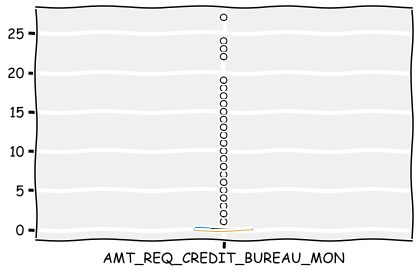

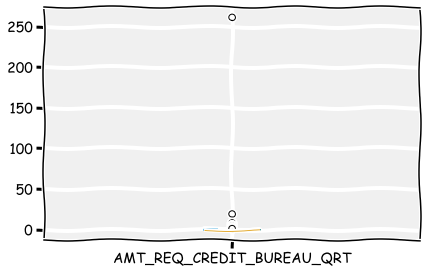

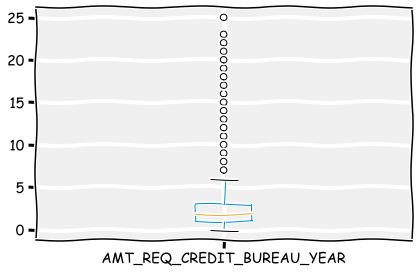

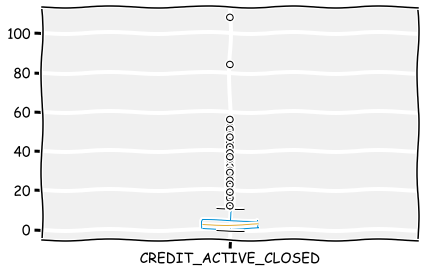

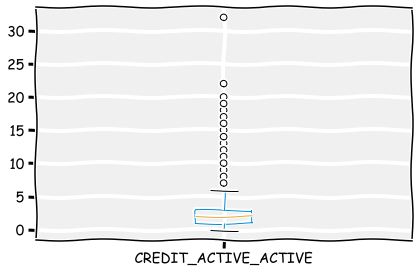

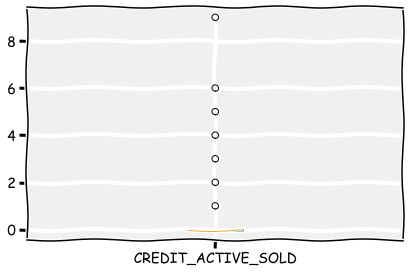

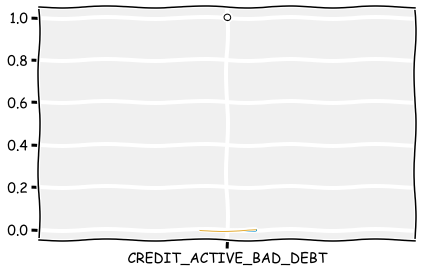

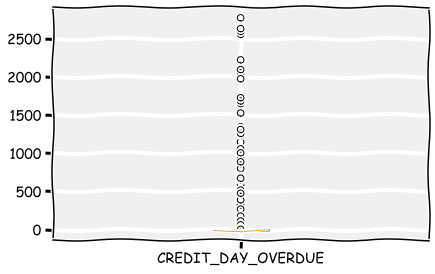

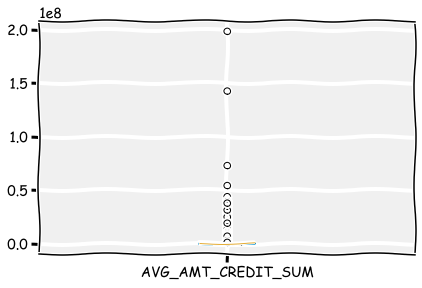

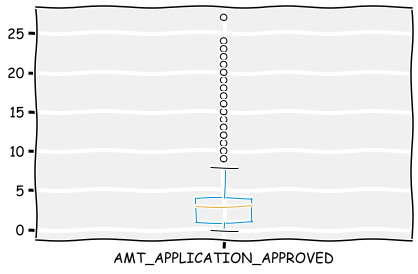

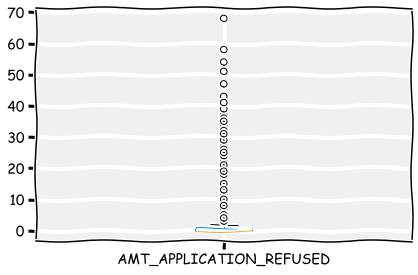

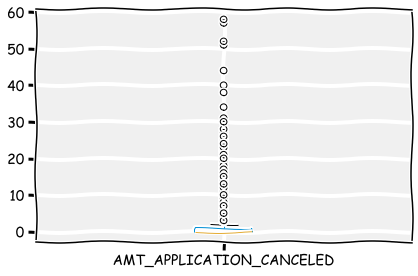

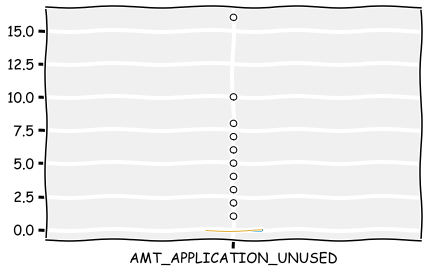

In [19]:
for c in df.select_dtypes(include=['int64', 'float64']).columns:
    df.boxplot(column=[c])
    plt.show()

In [20]:
# df1 = df.copy()
a = df.select_dtypes(include=['int64', 'float64'])
for el in a:
    df = withoutOutliers(outlier(df[el]), df) # delete outliers from all numerical features

In [21]:
df.shape

(258061, 81)

# More modifications

In [22]:
## converting days columns with negative value to positive to make calculations easy as mentioned earlier

cols = ["DAYS_BIRTH" ,"DAYS_EMPLOYED" , "DAYS_REGISTRATION" , "DAYS_ID_PUBLISH"]
for i in cols:
    df[i] = df[i].abs()

    
## converting Age , Working_Exp , Id Doc Age Registration_Age column values into positive Years as mentioned earlier

df["DAYS_BIRTH"] = df["DAYS_BIRTH"].abs() // 365
df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].abs() // 365
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs() // 365
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].abs() // 365

## convert Income , Loan_Credit , Loan_Annuity ,Total_Goods_Price into Lakhs

cols =["AMT_INCOME_TOTAL" , "AMT_CREDIT" , "AMT_ANNUITY" ,"AMT_GOODS_PRICE"]
for i in cols:
    df[i] = df[i].apply(lambda x: round(x/100000,2))
    
## creating a new column to get the what % of income goes for loan payback

df["INCOME_LOAN_ANNUITY_PCT"] = df[["AMT_INCOME_TOTAL","AMT_ANNUITY"]].apply(lambda x: round((x.AMT_ANNUITY*100) / x.AMT_INCOME_TOTAL,2) , axis = 1)

## Creating a age bucket column

df["AGE_BUCKET"] = pd.cut(df.DAYS_BIRTH , [20,30,40,50,60,70],labels=["20-30","30-40","40-50","50-60","60-70"])

In [23]:
# ## converting Age , Working_Exp , Id Doc Age Registration_Age column values into positive Years as mentioned earlier

# df["DAYS_BIRTH"] = df["DAYS_BIRTH"].abs() // 365
# df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].abs() // 365
# df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs() // 365
# df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].abs() // 365

In [24]:
# ## convert Income , Loan_Credit , Loan_Annuity ,Total_Goods_Price into Lakhs

# cols =["AMT_INCOME_TOTAL" , "AMT_CREDIT" , "AMT_ANNUITY" ,"AMT_GOODS_PRICE"]
# for i in cols:
#     df[i] = df[i].apply(lambda x: round(x/100000,2))

In [25]:
# ## creating a new column to get the what % of income goes for loan payback

# df["INCOME_LOAN_ANNUITY_PCT"] = df[["AMT_INCOME_TOTAL","AMT_ANNUITY"]].apply(lambda x: round((x.AMT_ANNUITY*100) / x.AMT_INCOME_TOTAL,2) , axis = 1)

In [26]:
# ## Creating a age bucket column

# df["AGE_BUCKET"] = pd.cut(df.DAYS_BIRTH , [20,30,40,50,60,70],labels=["20-30","30-40","40-50","50-60","60-70"])

In [27]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0              2.02        4.07         0.25             3.51   
1             0              2.70       12.94         0.36            11.29   
2             0              0.68        1.35         0.07             1.35   
3             0              1.35        3.13         0.30             2.97   
4             0              1.22        5.13         0.22             5.13   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0          25              1                9.0                5           1   
1          45              3                3.0                0           1   
2          52              0               11.0                6           1   
3          52              8               26.0                6           1   
4          54              8               11.0                9           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2   

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258061 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       258061 non-null  int64   
 1   NAME_CONTRACT_TYPE           258061 non-null  object  
 2   CODE_GENDER                  258059 non-null  object  
 3   FLAG_OWN_CAR                 258061 non-null  object  
 4   FLAG_OWN_REALTY              258061 non-null  object  
 5   CNT_CHILDREN                 258061 non-null  int64   
 6   AMT_INCOME_TOTAL             258061 non-null  float64 
 7   AMT_CREDIT                   258061 non-null  float64 
 8   AMT_ANNUITY                  258061 non-null  float64 
 9   AMT_GOODS_PRICE              258061 non-null  float64 
 10  NAME_TYPE_SUITE              258061 non-null  object  
 11  NAME_INCOME_TYPE             258061 non-null  object  
 12  NAME_EDUCATION_TYPE          258061 non-null

In [29]:
df = df.reset_index().drop(['index'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258061 entries, 0 to 258060
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       258061 non-null  int64   
 1   NAME_CONTRACT_TYPE           258061 non-null  object  
 2   CODE_GENDER                  258059 non-null  object  
 3   FLAG_OWN_CAR                 258061 non-null  object  
 4   FLAG_OWN_REALTY              258061 non-null  object  
 5   CNT_CHILDREN                 258061 non-null  int64   
 6   AMT_INCOME_TOTAL             258061 non-null  float64 
 7   AMT_CREDIT                   258061 non-null  float64 
 8   AMT_ANNUITY                  258061 non-null  float64 
 9   AMT_GOODS_PRICE              258061 non-null  float64 
 10  NAME_TYPE_SUITE              258061 non-null  object  
 11  NAME_INCOME_TYPE             258061 non-null  object  
 12  NAME_EDUCATION_TYPE          258061 non-null

In [30]:
# df.to_csv('preprocessed.csv')

In [31]:
df.shape

(258061, 83)

In [32]:
df.isna().sum()

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        2
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
C

In [33]:
##### 1)
df = df.drop(['ORGANIZATION_TYPE'], axis=1)

##### 2)

a = ['AMT_APPLICATION_APPROVED', 'AMT_APPLICATION_REFUSED', 'AMT_APPLICATION_CANCELED', 
     'AMT_APPLICATION_UNUSED', 'CODE_GENDER', 'CREDIT_ACTIVE_CLOSED', 'CREDIT_ACTIVE_ACTIVE', 
     'CREDIT_ACTIVE_SOLD', 'CREDIT_ACTIVE_BAD_DEBT', 'CREDIT_DAY_OVERDUE']

for col in a:
    df = df[df[col].notna()]
    
df['AVG_AMT_CREDIT_SUM'].fillna(df['AVG_AMT_CREDIT_SUM'].mean(), inplace=True)

In [34]:
df.to_csv('preprocessed.csv')

In [35]:
df.isna().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP